# About augmented tensors

Augmented tensors are at the core of the `aloscene` package. The idea behind augmented tensors is to make the transition from the data structure to the Tensor as seamless as possible. 

## Statefull tensors

One nice property of augmented tensors is that can encode a known state that will be preserved over time (as long as you'll use the provided methods in the `aloscene` package)

Let's take one example with the `BondixBoxes2d` augmented tensors.

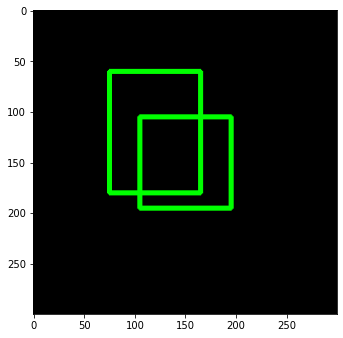

In [32]:
import aloscene

boxes = aloscene.BoundingBoxes2D([
    [0.5, 0.5, 0.3, 0.3], 
    [0.4, 0.4, 0.3, 0.4]], 
    boxes_format="xcyc",
    absolute=False
)
boxes.get_view().render()

In the above example, `boxes` is a specific tensor with properties and methods related to 2d boxes. You can at any point in the program know the state of the Tensor by look into the attached properties.

In [33]:
print("boxes names", boxes.names)
print("boxes_format", boxes.boxes_format) # What is the current pos
print("absolute", boxes.absolute) # Is the position relative or absolute

boxes names ('N', None)
boxes_format xcyc
absolute False


Because the tensor is stateful, you can convert your boxes into other types without worrying about the current state of your tensor.

In [34]:
# Encode the boxes in x1,y1,x2,y2 instead of xc, yc, w, h
boxes = boxes.xyxy()
# Convert the boxes values to absolute.
# to do so, the frame size must be known.
boxes = boxes.abs_pos((500, 500))
print(boxes)

tensor(
	boxes_format=xyxy, absolute=True, frame_size=(500, 500), 
	
	[[175., 175., 325., 325.],
        [125., 100., 275., 300.]])


Since your tensor is state full, you don't need to know its current state to run some boxes related operations.

iou tensor([[1.0000, 0.3125],
        [0.3125, 1.0000]])
iou tensor([22500., 30000.])


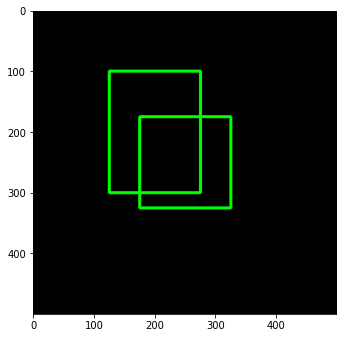

In [35]:
print("iou", boxes.iou_with(boxes))
print("iou", boxes.area())
boxes.get_view().render()

<div class="alert alert-info">
**NOTE**
The size of the displayed image is different from the first one since we're now using absolute boxes with known frame sizes.
</div>

Before being an augmented tensor, `boxes` is first of all a tensors. Therefore, you can at any point, use it as such while tracking your gradient.

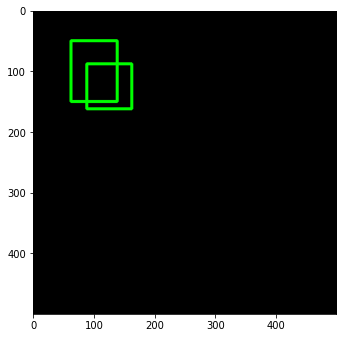

In [36]:
boxes = boxes * 0.5
boxes.get_view().render()

<div class="alert alert-warning">
    
**Warning**

Be careful though, PyTorch does not yet support all types of operations with `names` tensors.  Also, since `boxes` is responsible for keeping a coherent structure, some of your operations could at some point change the tensor content so that it will not encode the specific type of date you were expected. 

</div>

To prevent such an issue, you should first convert your augmented tensor to a regular tensor using `as_tensor()`

In [39]:
import torch
dist = torch.cdist(boxes.as_tensor(), boxes.as_tensor(), p=2)
print(dist)

tensor([[ 0.0000, 53.0330],
        [53.0330,  0.0000]])


## Augmented tensors and attached labels.

One other nice aspect of augmented tensors is that some augmented tensors can be linked with one an others. By doing so, you can structure your tensors and their relationships while keeping their values coherent.


For instance, one might need to handle `frames` and `boxes` for training some model. Therefore the ground truth boxes will be attached and co-dependent of the `frames`. If the frame is changed, cropped or resized, so the ground true boxes.

The following example illustrates how one can change the structure of one augmented tensor and perform operations on it.

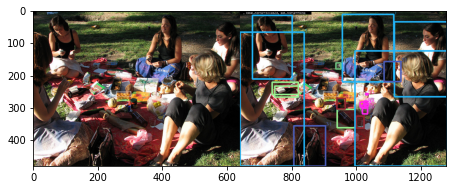

In [76]:
import alodataset
frame = alodataset.CocoDetectionDataset(sample=True).getitem(2)
boxes = frame.boxes2d
frame.get_view().render()

In [71]:
print(boxes)

tensor(
	boxes_format=xyxy, absolute=True, frame_size=(480, 640), 
	labels=torch.Size([19])
	[[300.0600, 303.7500, 355.4000, 360.7200],
        [106.7600, 231.5900, 180.3800, 266.3100],
        [359.3700, 325.0000, 382.6600, 362.2000],
        [166.3500, 355.1900, 263.7500, 480.0000],
        [315.9700,  10.3700, 474.9500, 219.4300],
        [476.7600,  33.4400, 640.0000, 265.3500],
        [355.1600, 123.3400, 640.0000, 480.0000],
        [  0.0000,  65.3200, 198.1200, 480.0000],
        [ 37.7500,  12.9400, 160.7200, 210.3400],
        [445.2600, 156.5000, 497.1100, 217.9700],
        [ 98.7100, 220.2600, 179.6000, 257.5700],
        [295.6200, 159.9900, 310.7200, 179.4900],
        [298.5100, 270.2300, 324.5500, 302.6400],
        [371.0700, 282.0300, 384.9800, 296.8100],
        [385.4800, 286.2700, 396.0800, 294.6600],
        [376.3000, 290.7600, 388.8800, 300.5500],
        [382.1400, 279.1000, 394.4000, 289.2600],
        [388.4200, 255.2400, 395.3200, 258.5800],
        [377.8

As we can see above, boxes are a tensor with a specific `boxes_format`, encoding with `absolute` value based on a known `frame_size`.  

We can also see that the boxes have another augmented tensor attached: `labels`. This one gives information about the boxes labels.

In [72]:
print(boxes.labels)

tensor(
	encoding=id, labels_names=['N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'], 
	
	[44., 44., 47., 31., 

Let's remove the 2d boxes and keep only the one with the `person` label.

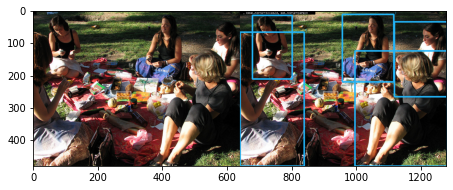

In [77]:
person_boxes = frame.boxes2d[(boxes.labels == 1).as_tensor()]
frame.boxes2d = None 
frame.append_boxes2d(person_boxes, "person")
frame.get_view().render()

Now let's add an other set of boxes filtering with an other label.

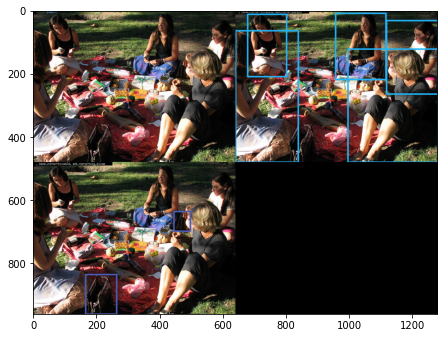

In [78]:
bag_boxes = boxes[(boxes.labels == 31).as_tensor()]
frame.append_boxes2d(n_boxes, "bag_boxes")
frame.get_view().render()

Now, we endup with a framr with two set of boxes. The first set is for the `person`, the second set if for the `bag` boxes.

## Transforming augmented tensors

Now that our structure is set up, we can slightly play with the structure of the frames. First, let's create a new flipped version of the frame.

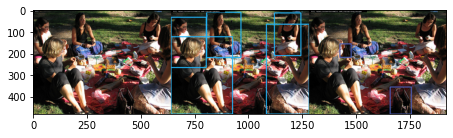

In [85]:
flipped_frame = frame.hflip()
flipped_frame.get_view().render()

As you can see, using only one line, we can flip the frame while keeping the data coherent. since the boxes are also flipped. Now, let's try to concat the two frames.

In [81]:
print(frame.shape, frame.names)
print(flipped_frame.shape, flipped_frame.names)

torch.Size([3, 480, 640]) ('C', 'H', 'W')
torch.Size([3, 480, 640]) ('C', 'H', 'W')


To do so, we're gonna need a new dimension. Usually, we would have call the unsqueeze method with the concat method. But because we'll prefer to track our frame structure, we're gonna use the `batch()` method provided by augmented tensor API. The latter we'll automatically extend the frame and all attached labels (if needed) with a new batch dimension.

In [82]:
frame = frame.batch()
flipped_frame = flipped_frame.batch()

print(frame.shape, frame.names)
print(flipped_frame.shape, flipped_frame.names)

torch.Size([1, 3, 480, 640]) ('B', 'C', 'H', 'W')
torch.Size([1, 3, 480, 640]) ('B', 'C', 'H', 'W')


Now we can concat and display both frames together.

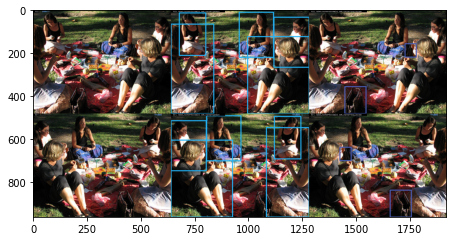

In [84]:
frames = torch.cat([frame, flipped_frame], dim=0)
frames.get_view().render()